## <font color = red> *** FILL HERE *** </font>
Juuso Pyykkönen <br>
522060 <br>
jhpyyk@utu.fi  <br>
18.11.2022  <br>


------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The questions to be answered at this stage could be for example:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

<i>Machine learning</i> is a subfield of artificial intelligence which provides automatic, objective and data-driven techniques for modeling the data. The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this exercise, we are going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format, so that models can learn something from it. Even though we are not doing any major data exploration nor data preparation here this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

<font color = red size = 4><b>The deadline is 28 November at 18:00</b></font>. Late submissions will not be accepted unless there is a valid excuse for extending the deadline before the due date.

------

### Gather **all** packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [183]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Added RidgeCV
from sklearn.linear_model import Ridge, RidgeCV

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.

But first, we need data for the task. The code for loading the data into the environment is provided for you. <font color = red>The code should work, but make sure, that you have the csv file of the data in the same directory where you have this notebook file.</font> 

***Exercise 1 A)*** 

Print the first 10 rows to check that everything is ok with the created dataframe.

*note: as said, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable gluc (about glucose levels), which is one-hot-encoded for you. It has the similar values as cholesterol originally does [normal, at risk, elevated]. Also, binary variables have been changed to [0,1] values.*


In [184]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path, dtype='int')

In [185]:
# Print the first 10 rows
cardio_data.head(10)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,0,1,0,0,1
1,19102,0,164,80,140,90,0,0,1,0,0,0,1,0,0,1
2,23251,0,155,76,130,80,0,0,1,0,0,0,1,0,1,0
3,22651,1,169,65,120,80,0,0,1,0,0,0,1,0,0,1
4,21770,1,171,67,160,100,0,0,0,1,0,0,1,0,0,1
5,14651,1,170,70,120,80,0,0,1,0,0,0,1,0,0,1
6,17391,0,152,65,110,70,0,0,1,0,0,0,1,0,0,1
7,14792,0,165,65,120,70,0,0,1,0,0,0,1,0,0,1
8,15982,1,180,81,110,70,1,0,1,0,0,0,1,0,0,1
9,19589,0,156,60,120,90,0,0,1,0,0,0,1,0,0,1


----

We have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, we are going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, we'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keep in mind that the test set is not shown for the model before we are actually done with training. 

So, to **find the estimate for the performance of a model**, we are going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because we literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

***Exercise 1 B)*** 

Gather the features as an array `features`, and the target variable as an array `labels`. Produce training and test data.  Divide the data **randomly** into training (80%) and test (20%) sets.

- Would it be a good idea to use stratification? **Explain** your decision.

In [186]:
### Code - Train-test split

# from https://stackoverflow.com/questions/20230326/retrieve-dataframe-of-all-but-one-specified-column
features = cardio_data.loc[:, cardio_data.columns != 'cardio']

labels = cardio_data['cardio']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.8, shuffle=True, random_state=122, stratify=labels)

Stratification is used here because only 29% of the samples have ```cardio = 1```.

----------

***Exercise 1 C)*** 

Scale the numeric features. 

- Remind yourself briefly why you need this step. 
- What can you say about scaling especially from the perspective of the k-NN algorithm?

*tip: You should now have **two** variables where you have the features divided into. Don't forget to scale the test data. Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html.*

Standardization is a good choice because for example the age values are very large compared to height and can dominate the calculations in distance based algorithms such as k-NN. Also scikit-learn *StandardScaler* docpage states that: "*Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).*"

In [187]:
### Code - Standardization

# Use features_train as a base for standardization
scaler = StandardScaler().fit(features_train)

# Scale the features_train set
features_train_scaled = scaler.transform(features_train)
features_train_scaled.mean(axis=0)

array([-5.75095527e-16,  5.10702591e-17, -1.30229161e-15,  1.17683641e-16,
        4.17443857e-16, -6.52811138e-16, -3.55271368e-17, -3.77475828e-17,
        1.03250741e-16,  0.00000000e+00, -4.44089210e-18, -5.32907052e-17,
        5.66213743e-17, -5.21804822e-17,  5.99520433e-17])

Mean values are effectively 0 as they should be.

In [188]:
# Scale the test data with the same scaler
features_test_scaled = scaler.transform(features_test)

-------

It's time for us to train the model!

***Exercise 1 D)*** 

Train a k-NN model with $k=3$. Print out the confusion matrix.
- What can you say about the confusion matrix?
- How does the model perform with the different classes? Where do you think the differences come from?
- What is the total classification accuracy? How would you interpret it?
- Perform also the following:
    - Make 1000 **different** train and test set splits.
    - Run the k-NN model (with $k=3$) for each split and save its accuracy.  
    - Plot accuracies in a histogram.
    - Discuss your results


*tip: `sklearn.metrics.classification_report` is a great way to build up a text report showing the main classification metrics*

In [189]:
### Code - kNN classifier

knn3 = KNeighborsClassifier(n_neighbors=3)

# From scikit-learn docs: Fit the k-nearest neighbors classifier from the training dataset
fit  = knn3.fit(features_train_scaled, labels_train)
# From scikit-learn docs: Predict the class labels for the provided data
predictions = fit.predict(features_test_scaled)
# Generate confusion matrix
confus_matrix = metrics.confusion_matrix(y_true=labels_test, y_pred=predictions)
confus_matrix


array([[122,  21],
       [ 26,  31]])

The confusion matrix shows that there are 121 true positives, 21 false positives, 26 false negatives, and 31 true negatives.

In [190]:
print(metrics.classification_report(y_true=labels_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       143
           1       0.60      0.54      0.57        57

    accuracy                           0.77       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.76      0.77      0.76       200



The model performs much better at predicting patient not having cardiovascular disease than patient having cardiovascular disease.

I think predicting not having cardiovascular is easier because patients with very good values in each feature are very likely to not have the disease. In contrast, patients with bad values could either have the disease or not have the disease. Therefore predicting a positive on the disease is more inaccurate.

Accuracy of the model is 0.77. This seems way too low for making any reliable predictions about a possibly life-threatening disease. False positives are not a problem but false negatives are very dangerous, in my opinion.

In [191]:
### Code - 1000 different train-test-splits

# Scale the features
scaler_1000 = StandardScaler().fit(features)
features_1000_scaled = scaler_1000.transform(features)

# Create 1000 different train-test-splits 
tt_splits = []
for i in range(1000):
    # Use stratify here because so many splits are created
    features_train_1000, features_test_1000, labels_train_1000, labels_test_1000 = train_test_split(features_1000_scaled, labels, train_size=0.8, shuffle=True, stratify=labels,  random_state=200 + i)
    tt_split = []
    tt_split.append(features_train_1000)
    tt_split.append(features_test_1000)
    tt_split.append(labels_train_1000)
    tt_split.append(labels_test_1000)
    tt_splits.append(tt_split)

# Check that the splits are created correctly
print(tt_splits[0][0])
print(tt_splits[1][0])
print('splits: ', len(tt_splits))


[[-1.57734979e+00 -7.41881120e-01 -1.07962713e+00 ... -2.63664022e-01
  -2.48135296e-01  3.74500808e-01]
 [ 2.11182918e-03  1.34792485e+00  1.37436443e+00 ... -2.63664022e-01
  -2.48135296e-01  3.74500808e-01]
 [-1.17063235e-01 -7.41881120e-01 -5.62997327e-01 ... -2.63664022e-01
  -2.48135296e-01  3.74500808e-01]
 ...
 [-5.33661233e-03 -7.41881120e-01 -9.50469679e-01 ... -2.63664022e-01
   4.03005947e+00 -2.67022121e+00]
 [ 1.56510848e+00 -7.41881120e-01 -4.63675248e-02 ... -2.63664022e-01
  -2.48135296e-01  3.74500808e-01]
 [-1.78865032e+00  1.34792485e+00 -5.62997327e-01 ... -2.63664022e-01
   4.03005947e+00 -2.67022121e+00]]
[[-0.59415551 -0.74188112 -1.20878458 ... -0.26366402 -0.2481353
   0.37450081]
 [-1.46209496 -0.74188112  0.72857718 ... -0.26366402 -0.2481353
   0.37450081]
 [-0.09079768 -0.74188112 -0.04636752 ... -0.26366402 -0.2481353
   0.37450081]
 ...
 [ 1.62077578 -0.74188112 -0.17552498 ... -0.26366402  4.03005947
  -2.67022121]
 [ 1.31264551 -0.74188112 -0.04636752 

Not sure if ```random_state``` being different guarantees that there are no duplicates but at least it's very unlikely.

In [192]:
# tt_split[0] == features_train
# tt_split[1] == features_test
# tt_split[2] == labels_train
# tt_split[3] == labels_test

accuracies_1000 = []
for tt_split in tt_splits:
    # Fit the k-nearest neighbors classifier from the training dataset
    fit_1000 = knn3.fit(tt_split[0], tt_split[2])
    # Predict the class labels for the provided data
    predictions_1000 = fit.predict(tt_split[1])
    report_1000 = metrics.classification_report(y_true=tt_split[3], y_pred=predictions_1000, output_dict=True, zero_division=True)
    accuracies_1000.append(report_1000['accuracy'])

<AxesSubplot: ylabel='Count'>

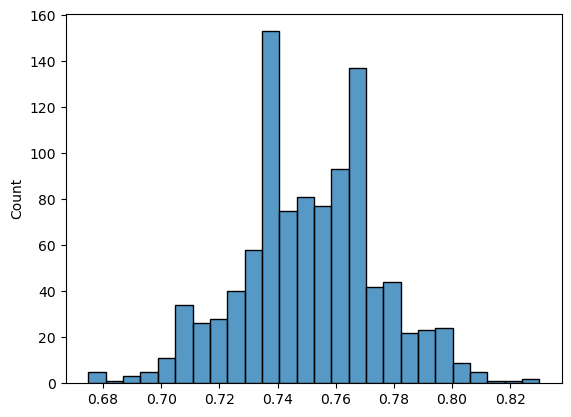

In [193]:
sns.histplot(accuracies_1000)

In [194]:
np.mean(accuracies_1000)

0.7509

<font color = red> \*** Answer here - Discuss your results. What can you see? What do you think is relevant? \*** </font>

Like already stated earlier, false negatives could literally be deadly and the accuracy is not nearly enough for any real life use, even though that's not the goal here with this model. With some splits, the accuracy is a little bettter than the earlier accuracy with only split. The mean is of the accuracies is almost the same as the earlier accuracy with only one split, as expected.

------

One really common evaluation metric is <font color = darkorchid><b>the area under the receiver operating characteristic (AUROC or AUC-ROC)</b></font>.

***Exercise 1 E)*** 

Explain what information you can learn about the one k-NN model you trained by using AUROC. Also, evaluate the performance by computing  the metric and plotting the related curve. Draw also the line for random guesses.

- How would you interpret the results?

AUROC gives a performance measure of true positives versus false positives.

In [195]:
### Code - AUROC and ROC Curves

metrics.roc_auc_score(y_true=labels_test, y_score=predictions)

0.6985032511348301

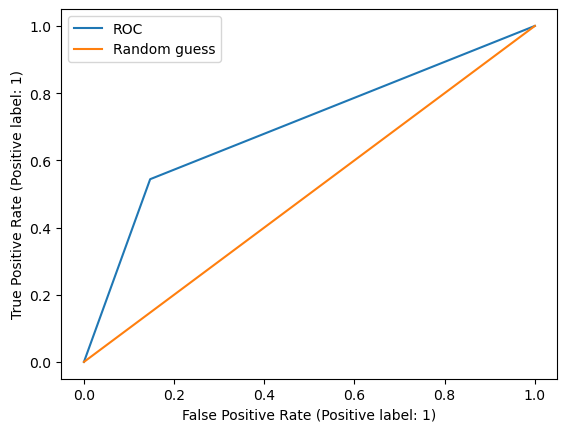

In [196]:
ax_roc = metrics.RocCurveDisplay.from_predictions(y_true=labels_test, y_pred=predictions, label='ROC')
ax_guess = sns.lineplot(x=[0,1], y=[0,1], dashes=True, label='Random guess')

<font color = red> \*** Answer here - Explain the results ***  </font>

The area under the curve is 0.6985. It doesn't seem to be a very good model because it's only a little better than a random guess. The result means that there are a lot of false positives when compared to true positives. If the guesser knows that 71.3% of the samples have ```cardio == 0```, by always guessing ```cardio == 0 ``` the random guesser is almost as accurate as the model. 

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation

Even thought the train-test split gives us an unbiased estimate of the performance, we only evaluate the model one time. Especially with very small data sets, a test set will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = darkorchid><b>cross-validation</b></font>. This time, we'll take a look at <font color = darkorchid><i>leave-one-out cross-validation</i></font>.

***Exercise 2 A)***

Describe *in your own words*, how leave-one-out cross validation works? How does it actually differ from the basic train-test split?

<font color = red> \*** Answer here *** </font>

Leave-one-out cross validation works as follows:
The length of the test set is always one and the length of the train set is always the length of the full set minus one. For a feature set of length 1000, the length of the train set is 999. The full set is iterated for the length of the full set (1000 in this case). In each iteration, the test set is one index and it changes for every iteration. This way every index will be the test set once. The train set is every index except the one index which is the test set.

This method evaluates the the model with all the data and all the data can be used to train the model. When using basic train-test-split, Only the train split used for training and the test split is used only for testing.

---------------

***Exercise 2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.

- What is the classification accuracy? Compare the result with the one you got in the previous task.

*tip: Sure this could be done manually, but `cross_val_score` is quite a handy function too.*

*Comment*: At first, I misunderstood the previous exercise of 1000 train-test-splits and did leave-one-out manually for that exercise, so I pasted that code here.

In [197]:
### Code - Leave-one-out cross validation v1

# Create leave-one-out indexes
leave_one_out = LeaveOneOut()
leave_one_out.get_n_splits(features)


1000

In [198]:
# Scale the features
scaler_loo = StandardScaler().fit(features)
features_scaled = scaler_loo.transform(features)

# Taken from scikit-learn docs and modified
accuracies_loo = []
for train_index, test_index in leave_one_out.split(features):
    features_train_loo = features_scaled[train_index]
    features_test_loo = features_scaled[test_index]
    labels_train_loo = labels.iloc[train_index]
    labels_test_loo = labels.iloc[test_index]

    # Fit the k-nearest neighbors classifier from the training dataset
    fit_loo = knn3.fit(features_train_loo, labels_train_loo)
    # Predict the class labels for the provided data
    predictions_loo = fit.predict(features_test_loo)
    report_loo = metrics.classification_report(y_true=labels_test_loo, y_pred=predictions_loo, output_dict=True, zero_division=True)
    accuracies_loo.append(report_loo['accuracy'])

<AxesSubplot: ylabel='count'>

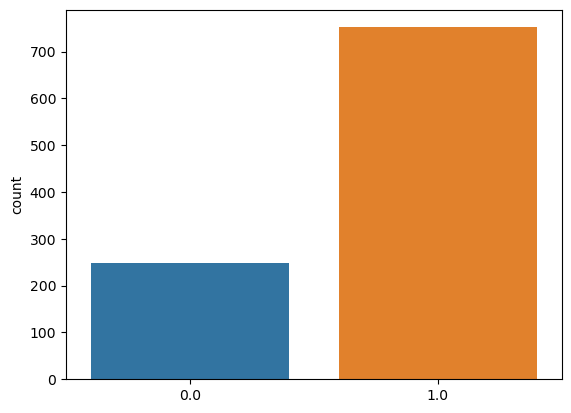

In [199]:
sns.countplot(x=accuracies_loo)

<AxesSubplot: ylabel='count'>

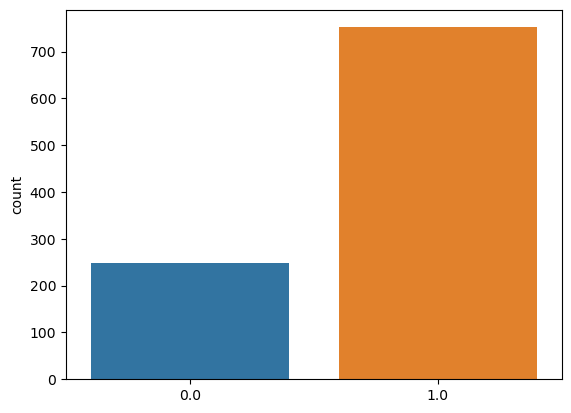

In [200]:
### Code - Leave-one-out cross validation v2

scores_loo = cross_val_score(estimator=knn3, X=features_scaled, y=labels, cv=leave_one_out)

sns.countplot(x=scores_loo)

In [201]:
accuracy_loo2 = np.sum(scores_loo)/len(scores_loo)
accuracy_loo2

0.752

<font color = red> \*** Answer here *** </font>

The accuracy is the same. Not sure if this is done correctly.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, we're going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3 for you. Note, k-NN has many other hyperparameters too, but for the sake of simplicity, this time we'll focus only on the nearest neighbors. 

Now, you're supposed to find that *optimal value* for k.

***Exercise 3***

Repeat the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.

- Which value of k produces the best classification accuracy?
- If the number of k is still increased, what is the limit that the classification accuracy approaches? Why? 
- Can you say something about the performance of this selected model with new, unseen data? Explain, how you could you estimate the performance of this selected model.

*tip: `GridSearchCV` is a good class for this but will you get the other but the best k value out of it?*

In [202]:
### Code - Select best k

accuracies_k_1_30 = []
for i in range(1, 31):
    knn_1_30 = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(estimator=knn_1_30, X=features_scaled, y=labels, cv=leave_one_out, n_jobs=-1)
    accuracies_k_1_30.append(np.sum(score) / len(score))

print(accuracies_k_1_30)

[0.718, 0.747, 0.752, 0.751, 0.76, 0.76, 0.772, 0.766, 0.771, 0.767, 0.768, 0.768, 0.771, 0.77, 0.773, 0.772, 0.773, 0.762, 0.773, 0.766, 0.771, 0.769, 0.775, 0.767, 0.774, 0.769, 0.774, 0.77, 0.774, 0.766]


In [203]:
best_k = np.argmax(accuracies_k_1_30)
best_k

22

In [204]:
score_k_50 = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=50), X=features_scaled, y=labels, cv=leave_one_out, n_jobs=-1)
np.sum(score_k_50) / len(score_k_50)

0.757

In [205]:
score_k_100 = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=100), X=features_scaled, y=labels, cv=leave_one_out, n_jobs=-1)
np.sum(score_k_100) / len(score_k_100)

0.736

In [206]:
score_k_200 = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=200), X=features_scaled, y=labels, cv=leave_one_out, n_jobs=-1)
np.sum(score_k_200) / len(score_k_200)

0.724

In [207]:
score_k_500 = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=500), X=features_scaled, y=labels, cv=leave_one_out, n_jobs=-1)
np.sum(score_k_500) / len(score_k_500)

0.713

In [208]:
score_k_999 = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=999), X=features_scaled, y=labels, cv=leave_one_out, n_jobs=-1)
np.sum(score_k_999) / len(score_k_999)

0.713

<font color = red> \*** Answer here *** </font>

The best accuracy is produced when $k = 22$. The limit when $k$ approaches 1000 is 0.713. This is because there are 713 values where ```cardio == 0```. I guess this model would perform with roughly the same acaccuracy with new data.

________________
## <font color = red>  4. Testing with training data <font color = red> (this should *never* be done out of this exercise!) </font>

Oh, but what if we just used the ***whole data*** in training? Wouldn't we like to use as much data as possible to discover the underlying pattern in the data so why **not** to use the whole data?

*Never ever* do this out of this exercise. Why? Let's take a look.

***Exercise 4***

Repeat the previous task but use the whole data for training. Plot the resulting classification accuracy versus $k = 1...30$. Include the values from the previous task in the *same figure*.

- Comment your result and answer, why you should not test with training data?

In [209]:
### Code - Train with whole data

accuracies_wrong = []
for i in range(1, 31):
    knn_1_30_wrong = KNeighborsClassifier(n_neighbors=i)
    fit_wrong = knn_1_30_wrong.fit(features_scaled, labels)
    predictions_wrong = fit_wrong.predict(features_scaled)
    report_wrong = metrics.classification_report(y_true=labels, y_pred=predictions_wrong, output_dict=True, zero_division=True)
    accuracies_wrong.append(report_loo['accuracy'])
print(accuracies_wrong)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


100% accuracy.

In [210]:
### Code - Plot results

 <font color = red> \*** Answer here *** </font>

 Either I don't understand the question or I accidentally already did this in the previous exercise. Someone asked about this in moodle but the answer didn't really help.

 From the course material: *"leave-one-out allows us to use the whole data set for both
training and testing simultaneously"*. Doesn't this contradict the question? If I do LOO here, wouldn't it be just the same as previous exercise?

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and kNN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression. We're going to use <font color = darkorchid><b>Ridge Regression</b></font> and <font color = darkorchid><b>K-Nearest Neighbors Regression</b></font>, and compare the performances of these models.

To make this exercise more intuitively, let's change the data to another somewhat famous dataset called *The Boston Housing Dataset*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Let's have a quick peek at the variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


No worries if the variables don't make a lot of sense. However, the object is to predict **the median house value**. So the target variable is now <font color = darkorchid><b>MEDV</b></font> and all the others are <font color = darkorchid><b>features</b></font>.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [211]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_boston_housing_data.csv'

# Load the data 
boston_data = pd.read_csv(data_path, dtype='float')

-----------

With regression, we can examine **the relationship between two or more variables**. This relationship is represented by an *equation*, which itself represents how much y changes with any given change of x. So for example, we could use *age* as an independent variable to predict *height* (a dependent variable). 

We start by looking at the relationships between the variables in the given dataset.


***Exercise 5 A)***

Make scatter plots where you present each feature versus the target variable `MEDV`.

- What can you say about the relationships?

*tip: seaborn.pairplot is quite a handy function where you can set x_vars and y_vars to point out the variables you need*

In [212]:
boston_features = boston_data.loc[:, boston_data.columns != 'MEDV']
boston_labels = boston_data['MEDV']
boston_labels.rename('MEDV')

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
462    22.4
463    20.6
464    23.9
465    22.0
466    11.9
Name: MEDV, Length: 467, dtype: float64

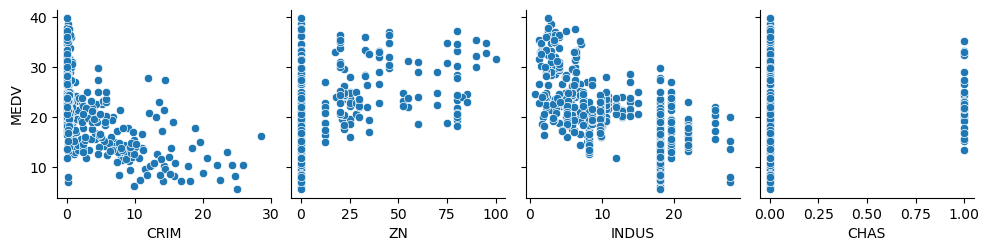

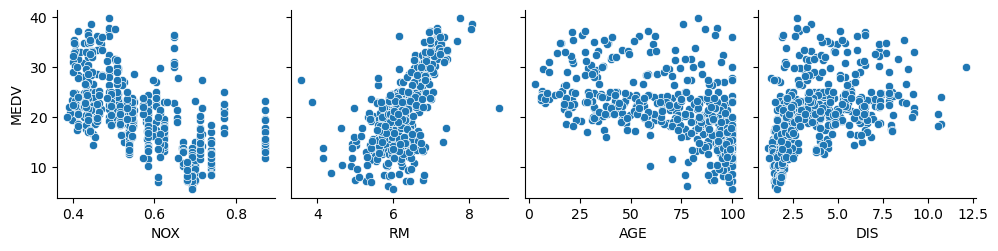

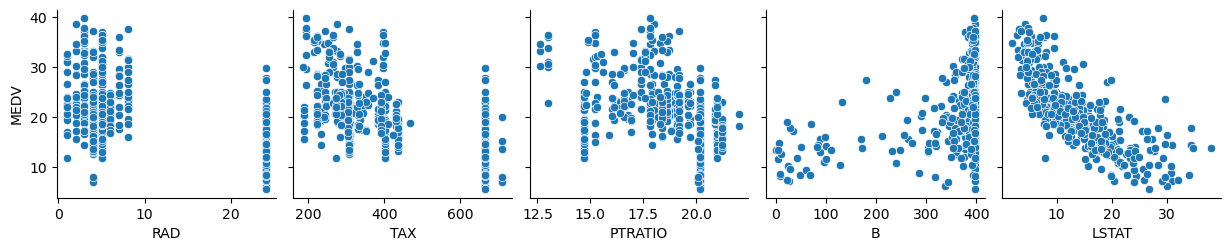

In [213]:
### Code - Scatter plots

sns.pairplot(data=boston_data, x_vars=boston_features.columns[0:4], y_vars=boston_labels.name)
sns.pairplot(data=boston_data, x_vars=boston_features.columns[4:8], y_vars=boston_labels.name)
sns.pairplot(data=boston_data, x_vars=boston_features.columns[8:], y_vars=boston_labels.name)

<font color = red>\*** Answer here - the relationships *** </font> 

Just by looking at the plots, there seems to be some correlation between the median values of homes and almost every variable, except maybe the proportion of residential land zoned for lots over 25,000 sq.ft. (ZN), Charles River tracting (CHAS), and index of accessibility to radial highways (RAD).

------

We are about to compare two different regression models. We need to be sure that both are *the best models* among the other trained models. But to make sure that these selected models really are the best ones, we're going to use a combination of cross-validation and hyperparameter tuning right away. What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?

For the k-Nearest neighbors, we have previously get familiar with the optimization of the k value. Let's continue with this value to find the *optimal k* for the k-nearest neighbors regression too. With ridge regression, we have this hyperparameter called $\lambda$ (read as 'lambda'). We'll use this parameter for model selection.


To compare the models, let's use a loss function called <font color = darkorchid><b>mean absolute error (MAE)</b></font>. 



***Exercise 5 B)***

Do you need to prepare the data a little? Explain your decision.

In [214]:
### Code - Preparation

# Scale the features
boston_scaler = StandardScaler().fit(boston_features)
boston_features_scaled = boston_scaler.transform(boston_features)

<font color = red>\*** Answer here *** </font> 

Features and labels (or target) are divided into their own dataframes and the features are scaled. The division just makes code more readable and simple. Scaling is important for the results.

------

***Exercise 5 C)***

Then, train a ridge regression model  and a k-NN regression model. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation.

- What are the total performances of each model and how they compare with each other? 
- What does the MAE tell you about the performances of your models and in general?

*note: In a `sklearn.linear_model.Ridge` class, lambda is called alpha so don't get confused*

In [215]:
### Code - Ridge regression

lambdas = []
for i in range(-10, 11):
    lambdas.append(2**i)


# Uses leave-one-out validation by default
model = RidgeCV(alphas=lambdas, scoring='neg_mean_absolute_error').fit(X=boston_features_scaled, y=boston_labels)

In [216]:
print('Best score:', np.absolute(model.best_score_))
print('Best lambda:',  model.alpha_)

Best score: 2.54647123640556
Best lambda: 0.25


In [217]:
### Code - k-NN regression

knn_regressor_scores = []

for i in range(1,31):
    knn_regressor = KNeighborsRegressor(n_neighbors=i, n_jobs=-1)
    scores_for_this_k = cross_val_score(estimator=knn_regressor, X=boston_features_scaled, y=boston_labels, scoring='neg_mean_absolute_error', cv=LeaveOneOut(), n_jobs=-1)
    knn_regressor_scores.append(np.mean(np.absolute(scores_for_this_k)))

In [218]:
print('Best k:', np.argmin(knn_regressor_scores))
print('Best score:', knn_regressor_scores[knn_regressor_best_k])

Best k: 2
Best score: 2.058315488936474


<font color = red>\*** Answer here - discuss your results (comparison and MAE) ***</font>

The best MAE for Ridge regression was 2.546 and the lambda for that MAE is $0.25 = 2^{-2}$. The best MAE for k-NN regressor is 2.058 and k for that MAE is 2.

k-NN regression has a lower mean absolute error and therefore is the better model in this case.

RidgeCV was very fast compared to the k-NN regressor, at least when executed like this.

------

We can say something about the performance now. One way to do the visualization is to plot actual labels vs predicted labels. Let's do that.


***Exercise 5 D)***

Using the best models found in the previous exercise, plot the actual labels vs. predicted labels. 

- How did the selected models perform?
- In an ideal situation, where should the data points be located?

In [219]:
# Create train-test-splits
boston_features_train, boston_features_test, boston_labels_train, boston_labels_test = train_test_split(boston_features_scaled,
                                                                                                        boston_labels,
                                                                                                        train_size=0.8,
                                                                                                        shuffle=True,
                                                                                                        random_state=1332)

In [220]:
### Code - Plot actual vs predicted labels

# Train the models with the best values
ridge_model = Ridge(alpha=0.25).fit(X=boston_features_train, y=boston_labels_train)
ridge_predictions = model_ridge.predict(boston_features_test)
knn_2_regressor = KNeighborsRegressor(n_neighbors=2, n_jobs=-1).fit(X=boston_features_train, y=boston_labels_train)
knn_2_regressor_predictions = knn_2_regressor.predict(boston_features_test)

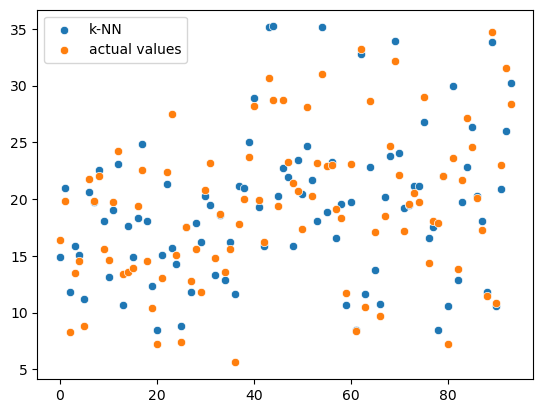

In [221]:
ax_knn_pred = sns.scatterplot(data=knn_2_regressor_predictions, label='k-NN')
# Use to_numpy() to remove the indices
ax_labels = sns.scatterplot(data=boston_labels_test.to_numpy(), label='actual values')

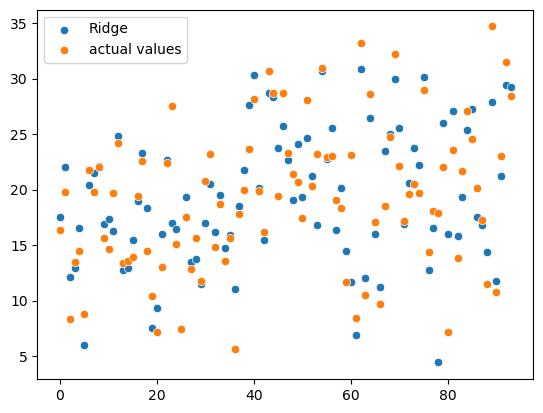

In [222]:
ax_ridge_pred = sns.scatterplot(data=ridge_predictions, label='Ridge')
# Use to_numpy() to remove the indices
ax_labels = sns.scatterplot(data=boston_labels_test.to_numpy(), label='actual values')

<font color = red> \*** Answer here *** </font>

I guess the models performed okay, sometimes the predictions are very from from the actual value though. Don't know what else to say about performance. In an ideal situation the points would overlap.

________________
## <font color = dimgrey> BONUS: Feature selection - most useful features in predicting the disease </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain me what you did and why you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors are not able to measure all the values represented in the given dataset. Luckily, keen students are ready to help: You should now find <font color = darkorchid><b>five [5] most useful features</b></font> in predicting the presence of the cardiovascular disease among the ones in the given cardio data set. 

Use the selected features to train and test a model of your choice. Evaluate the performance by computing the accuracy and drawing a ROC curve. Remember not to use any information from the test set when selecting the features!

**Discuss** your results.

In [223]:
### Code - BONUS!

<font color = red> \*** Answer here *** </font>